In [18]:
from unittest import result
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from sko.GA import GA
import seaborn as sns  # seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  # 自相关图
from statsmodels.tsa.stattools import adfuller as ADF  # 平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf  # 偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (70, 20)  # 设置输出图片大小
sns.set(color_codes=True)  # seaborn设置背景
data=pd.read_csv('data.csv')
data.Date=pd.to_datetime(data.Date)


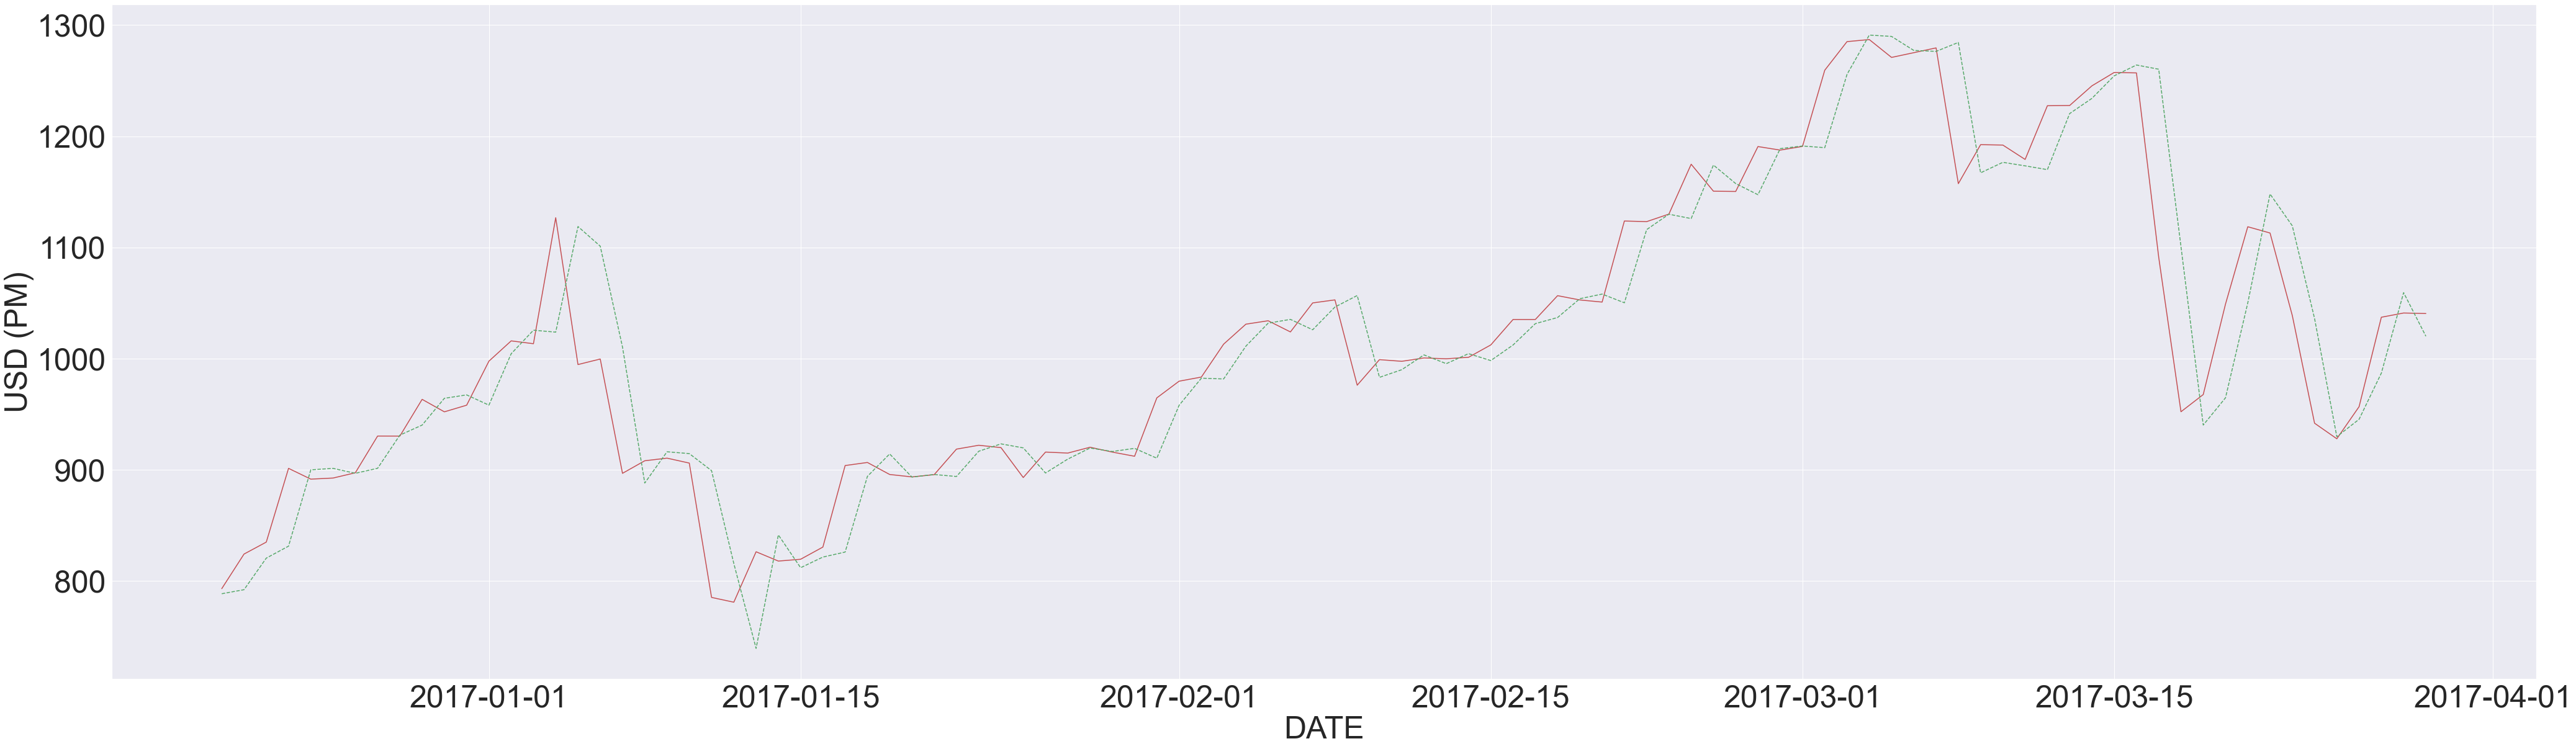

In [19]:
p1=plt.subplot(1,1,1)
p1.set_xlabel('DATE',fontsize=50)
p1.set_ylabel('USD (PM)',fontsize=50)
plt.xticks(size=50)
plt.yticks(size=50)
p1.plot(data['Date'][100:200], data['real_b'][100:200], 'r-', data['Date'][100:200], data['predict_b'][100:200],'g--')